In [ ]:
Необходимо построить минимум 5 визуализации различных видов по выбранным данным, 
используя хотя бы две из рассмотренных на занятии библиотек.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, 
какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) 
и какие гипотезы на ее основе можно выдвинуть.

Откуда брать данные?

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) 
или воспользоваться любым понравившемся из открытых источников (например, kaggle.com). 
Если идей нет, можете взять один из перечисленных ниже:

Данные IMDB;
Данные NYC;
Данные NBA.

In [170]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [166]:
data = pd.read_csv('Google-Playstore-32K.csv')
data.head()


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


In [167]:
data1 = data.filter(items = ['App Name', 'Reviews'])
popdata1 = data1[data1['Reviews'] > 10000000].sort_values('Reviews', ascending=False).head(15)
popdata1


,App Name,Reviews
671,WhatsApp Messenger,86214292.0
704,Facebook,85766433.0
653,Instagram,79726403.0
632,Messenger � Text and Video Chat for Free,65469531.0
628,Clash of Clans,48401470.0
7064,"Clean Master - Antivirus, Applock & Cleaner",44171776.0
813,YouTube,41919102.0
539,Subway Surfers,29834812.0
12638,"Security Master - Antivirus, VPN, AppLock, Boo...",25532160.0
1542,Clash Royale,25449254.0


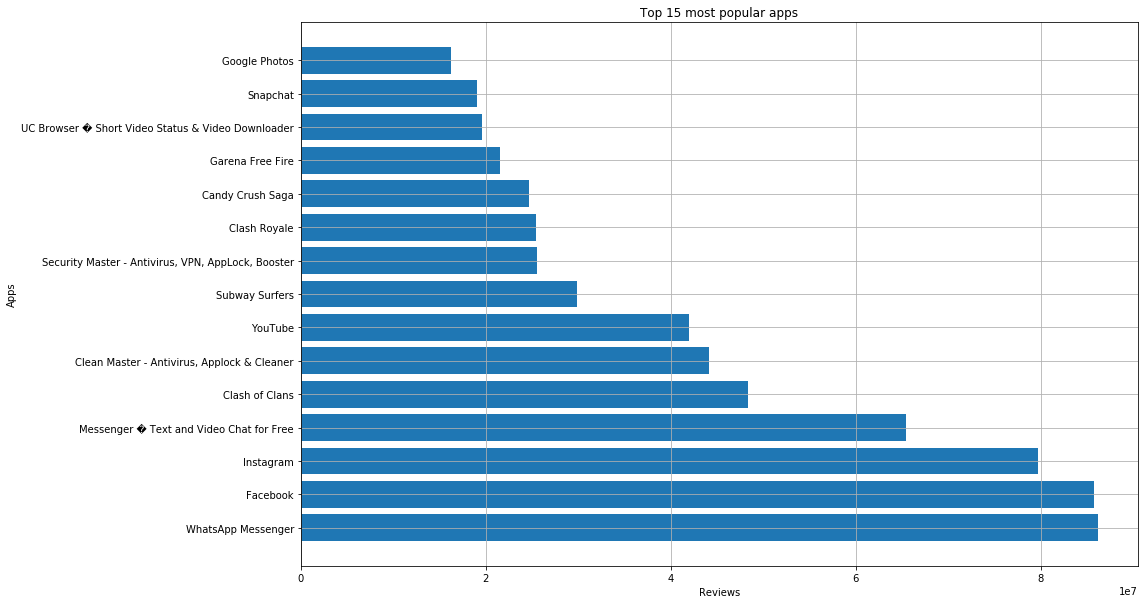

In [168]:
plt.barh(popdata1['App Name'], popdata1['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Apps')
plt.title('Top 15 most popular apps')
plt.grid()
#по колличеству ревью на приложение смотрим наиболее популярные. 
#самые популярные - мессенджеры и соц сети


In [171]:
data2 = data.filter(items = ['App Name', 'Price','Reviews'])
data2['Price'] = data2['Price'].str.replace(r'[$]', '')
free = np.sum(data2['Price'] == '0')
paid = np.sum(data2['Price'] != '0')


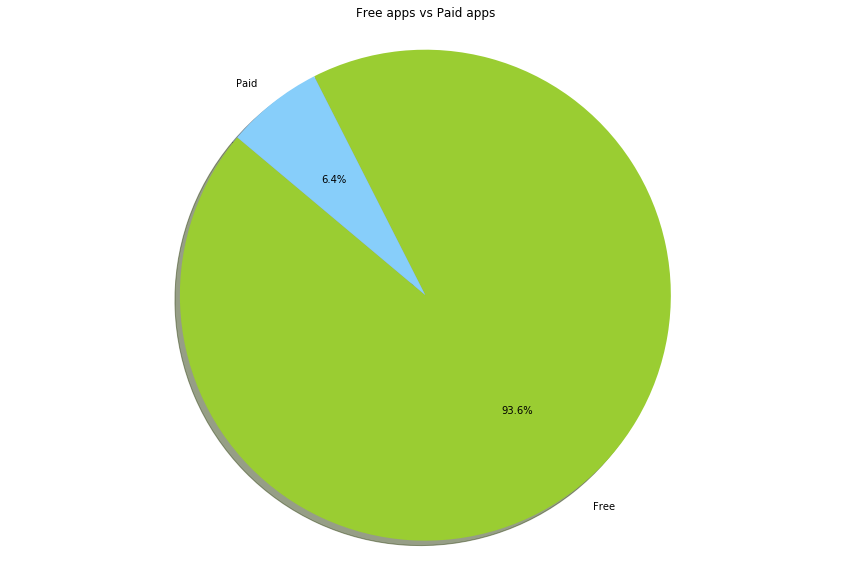

In [172]:
labels = 'Free', 'Paid'
sizes = [free, paid]
colors = ['yellowgreen', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Free apps vs Paid apps')
plt.show()
#определяем доли рынка платных и бесплатных(условно бесплатных) приложений. Подавляющее большинство бесплатных

In [173]:
import re

In [174]:
import seaborn as sns

In [177]:
df = pd.read_csv('Netflix Shows.csv', encoding='cp437')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [178]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
title                500 non-null object
rating               500 non-null object
ratingLevel          467 non-null object
ratingDescription    500 non-null int64
release year         500 non-null int64
user rating score    256 non-null float64
user rating size     500 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

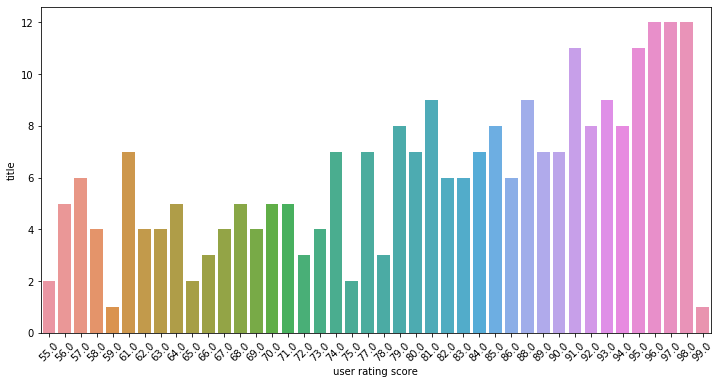

In [180]:
user_rating_score=df.groupby("user rating score")['title'].count().reset_index().sort_values(by='user rating score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(12,6))
sns.barplot(x='user rating score',y='title', data=user_rating_score)
plt.xticks(rotation=45)
#Смотрим какие оценки пользователи ставят чаще всего. Большее количество - высокие но не наивысшие.

In [181]:
df1=df[df['ratingLevel'].notnull()]

In [182]:
df1 = df[df['release year'] > 2009]
pivot_mov = df1.pivot_table(
                        index='rating', 
                        columns='release year', 
                        values='ratingDescription', 
                        aggfunc='mean').fillna(0).applymap(float)


pivot_mov 

release year,2010,2011,2012,2013,2014,2015,2016,2017
rating,,,,,,,,
G,0.0,35.0,35.0,35.0,35.0,35.0,35.0,0.0
NR,0.0,0.0,0.0,124.0,124.0,0.0,124.0,0.0
PG,60.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0
PG-13,0.0,80.0,80.0,80.0,0.0,0.0,0.0,0.0
R,0.0,100.0,100.0,0.0,100.0,100.0,100.0,0.0
TV-14,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
TV-G,35.0,35.0,35.0,35.0,35.0,35.0,35.0,0.0
TV-MA,110.0,0.0,110.0,110.0,110.0,110.0,110.0,110.0
TV-PG,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0


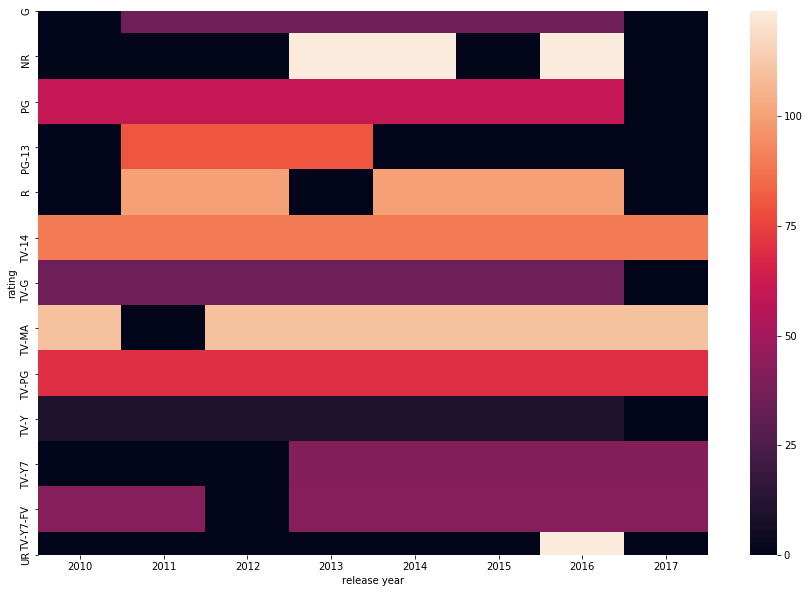

In [183]:
ax = sns.heatmap(pivot_mov)
#Средний рейтинг шоу за последние 10 лет по TV parental guidelines. За 2017 хорошие рейтинги у категорий до 14 лет и от 17

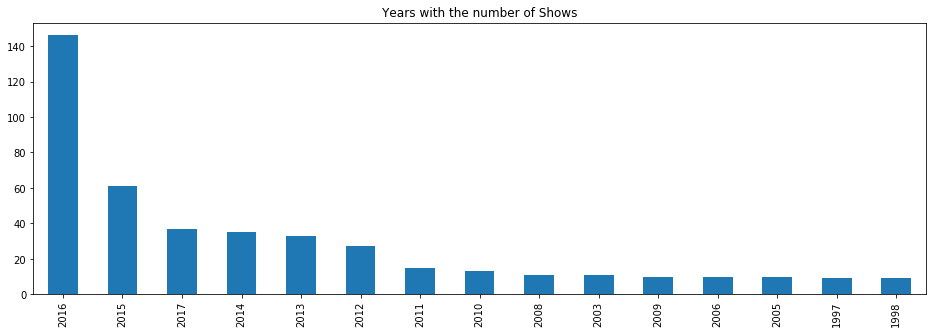

In [184]:
year_no_of_shows=df["release year"].value_counts().sort_values(ascending=False).head(15)
plt.figure(figsize=(16,5))
year_no_of_shows.plot(title='Years with the number of Shows',kind="bar")
#Выпуск шоу по годам. С каждым годом шоу все больше